In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.initializers import Initializer

# 한글 폰트 설정 (그래프에서 한글이 깨지지 않도록)
# Colab 또는 로컬 환경에 맞게 폰트 경로를 설정해야 할 수 있습니다.
try:
    import koreanize_matplotlib
except ImportError:
    !pip install koreanize_matplotlib
    import koreanize_matplotlib

# ---------------------------------
# 1. 데이터 준비 (MNIST)
# ---------------------------------
print("1. MNIST 데이터를 로드하고 전처리를 시작합니다...")
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화 (0~255 값을 0~1 사이로) 및 형태 변환
x_train, x_test = x_train / 255.0, x_test / 255.0
print("데이터 준비 완료!")

1. MNIST 데이터를 로드하고 전처리를 시작합니다...
데이터 준비 완료!


In [2]:
# ---------------------------------
# 2. 커스텀 초기화 함수 정의
# ---------------------------------
# 모든 가중치를 1로 설정하는 커스텀 초기화 클래스
class OnesInitializer(Initializer):
    def __call__(self, shape, dtype=None):
        return tf.ones(shape, dtype=dtype)

# ---------------------------------
# 3. 모델 생성 및 컴파일
# ---------------------------------
print("\n2. 두 가지 모델을 생성합니다: (A) 가중치=1, (B) 표준 초기화")

def create_model(initializer):
    """주어진 초기화 방식으로 모델을 생성하는 함수"""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer, bias_initializer='zeros'),
        tf.keras.layers.Dense(64, activation='relu', kernel_initializer=initializer, bias_initializer='zeros'),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer, bias_initializer='zeros') # 출력층은 일반적으로 표준 초기화 사용
    ])
    return model

# 모델 A: 모든 가중치를 1로 초기화 (대칭성 문제 발생)
model_A = create_model(OnesInitializer())

# 모델 B: 표준 무작위 초기화 (Keras 기본값: 'glorot_uniform')
model_B = create_model('glorot_uniform')

# 두 모델을 동일한 조건으로 컴파일
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']

model_A.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model_B.compile(optimizer=optimizer, loss=loss, metrics=metrics)

print("모델 생성 및 컴파일 완료!")
model_A.summary()


2. 두 가지 모델을 생성합니다: (A) 가중치=1, (B) 표준 초기화
모델 생성 및 컴파일 완료!


c:\Users\brigh\Documents\GitHub\AI-Lab\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# ---------------------------------
# 4. 모델 학습
# ---------------------------------
print("\n3. 두 모델의 학습을 시작합니다...")
epochs = 15
batch_size = 128

history_A = model_A.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test),
                        verbose=0) # 학습 로그는 생략


3. 두 모델의 학습을 시작합니다...


In [4]:
history_B = model_B.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test),
                        verbose=0) # 학습 로그는 생략
print("학습 완료!")

학습 완료!



4. 학습 결과를 시각화합니다.


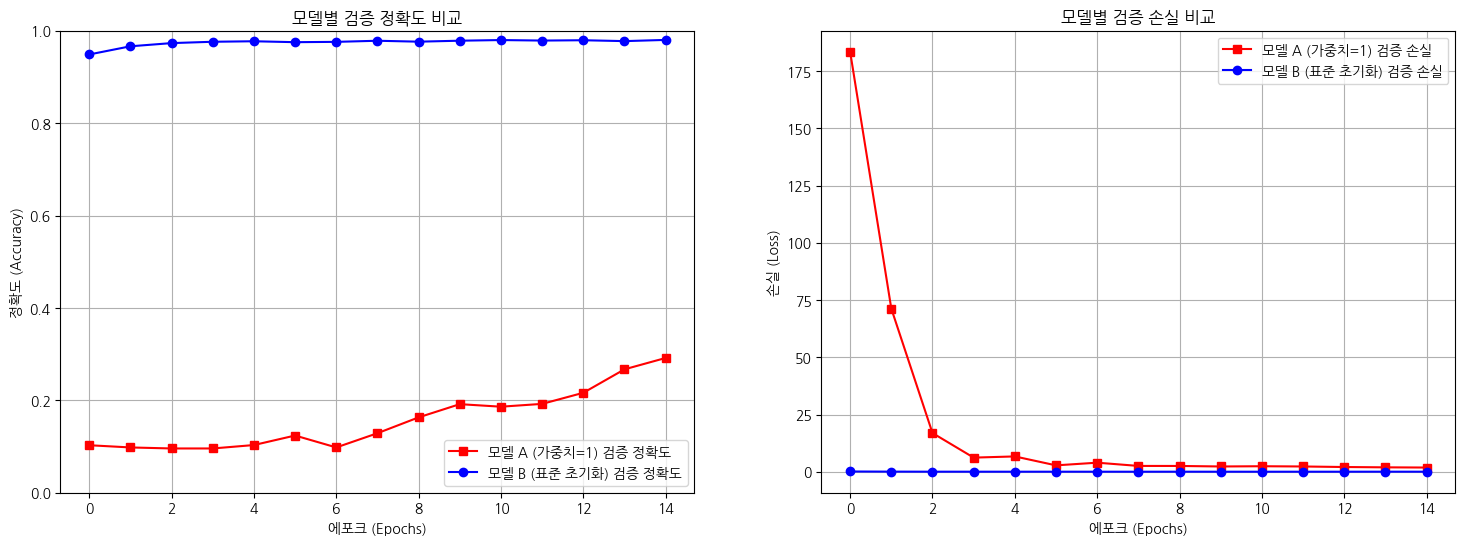

In [5]:
# ---------------------------------
# 5. 결과 시각화
# ---------------------------------
print("\n4. 학습 결과를 시각화합니다.")

plt.figure(figsize=(18, 6))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history_A.history['val_accuracy'], 'r-s', label='모델 A (가중치=1) 검증 정확도')
plt.plot(history_B.history['val_accuracy'], 'b-o', label='모델 B (표준 초기화) 검증 정확도')
plt.title('모델별 검증 정확도 비교')
plt.xlabel('에포크 (Epochs)')
plt.ylabel('정확도 (Accuracy)')
plt.ylim(0, 1.0) # Y축 범위를 0에서 1로 고정
plt.legend()
plt.grid(True)

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history_A.history['val_loss'], 'r-s', label='모델 A (가중치=1) 검증 손실')
plt.plot(history_B.history['val_loss'], 'b-o', label='모델 B (표준 초기화) 검증 손실')
plt.title('모델별 검증 손실 비교')
plt.xlabel('에포크 (Epochs)')
plt.ylabel('손실 (Loss)')
plt.legend()
plt.grid(True)

plt.show()

In [6]:
history_A.history['accuracy']

[0.09769999980926514,
 0.09841666370630264,
 0.10011667013168335,
 0.09939999878406525,
 0.10776666551828384,
 0.11291666328907013,
 0.11810000240802765,
 0.13598333299160004,
 0.14830000698566437,
 0.1618666648864746,
 0.18035000562667847,
 0.1983499974012375,
 0.21888333559036255,
 0.24015000462532043,
 0.2731666564941406]

In [7]:
# ---------------------------------
# 6. 훈련 후 모델별 가중치 확인
# ---------------------------------
print("--- 훈련 후 가중치 비교 ---")

# 모델 A의 첫 번째 Dense 레이어(인덱스 1)의 가중치(인덱스 0)를 가져옴
# 레이어 0: Flatten, 레이어 1: Dense(128)
weights_A1, biases_A1 = model_A.layers[1].get_weights()

print("\n--- 모델 A (가중치=1 초기화)의 첫 번째 은닉층 가중치 ---")
np.shape(weights_A1), np.shape(biases_A1)

--- 훈련 후 가중치 비교 ---

--- 모델 A (가중치=1 초기화)의 첫 번째 은닉층 가중치 ---


((784, 128), (128,))

In [8]:
weights_A1[:30, :30]  # (784, 128) 행렬의 좌측 상단 일부만 확인

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.

In [9]:
biases_A1

array([-0.97439945, -0.97439945, -0.97439945, -0.97439945, -0.97439945,
       -0.97439945, -0.97439945, -0.97439945, -0.97439945, -0.97439945,
       -0.97439945, -0.97439945, -0.97439945, -0.97439945, -0.97439945,
       -0.97439945, -0.97439945, -0.97439945, -0.97439945, -0.97439945,
       -0.97439945, -0.97439945, -0.97439945, -0.97439945, -0.97439945,
       -0.97439945, -0.97439945, -0.97439945, -0.97439945, -0.97439945,
       -0.97439945, -0.97439945, -0.97439945, -0.97439945, -0.97439945,
       -0.97439945, -0.97439945, -0.97439945, -0.97439945, -0.97439945,
       -0.97439945, -0.97439945, -0.97439945, -0.97439945, -0.97439945,
       -0.97439945, -0.97439945, -0.97439945, -0.97439945, -0.97439945,
       -0.97439945, -0.97439945, -0.97439945, -0.97439945, -0.97439945,
       -0.97439945, -0.97439945, -0.97439945, -0.97439945, -0.97439945,
       -0.97439945, -0.97439945, -0.97439945, -0.97439945, -0.97439945,
       -0.97439945, -0.97439945, -0.97439945, -0.97439945, -0.97

In [10]:
np.mean(weights_A1),  np.std(weights_A1)

(np.float32(0.41313028), np.float32(0.35700753))

In [11]:
np.mean(biases_A1), np.std(biases_A1)

(np.float32(-0.9743995), np.float32(5.9604645e-08))

In [12]:
weights_A2, biases_A2 = model_A.layers[2].get_weights()
np.shape(weights_A2), np.shape(biases_A2)

((128, 64), (64,))

In [13]:
weights_A2

array([[0.09029794, 0.09029794, 0.09029794, ..., 0.09029794, 0.09029794,
        0.09029794],
       [0.09029794, 0.09029794, 0.09029794, ..., 0.09029794, 0.09029794,
        0.09029794],
       [0.09029794, 0.09029794, 0.09029794, ..., 0.09029794, 0.09029794,
        0.09029794],
       ...,
       [0.09029794, 0.09029794, 0.09029794, ..., 0.09029794, 0.09029794,
        0.09029794],
       [0.09029794, 0.09029794, 0.09029794, ..., 0.09029794, 0.09029794,
        0.09029794],
       [0.09029794, 0.09029794, 0.09029794, ..., 0.09029794, 0.09029794,
        0.09029794]], dtype=float32)

In [14]:
biases_A2

array([-2.211186, -2.211186, -2.211186, -2.211186, -2.211186, -2.211186,
       -2.211186, -2.211186, -2.211186, -2.211186, -2.211186, -2.211186,
       -2.211186, -2.211186, -2.211186, -2.211186, -2.211186, -2.211186,
       -2.211186, -2.211186, -2.211186, -2.211186, -2.211186, -2.211186,
       -2.211186, -2.211186, -2.211186, -2.211186, -2.211186, -2.211186,
       -2.211186, -2.211186, -2.211186, -2.211186, -2.211186, -2.211186,
       -2.211186, -2.211186, -2.211186, -2.211186, -2.211186, -2.211186,
       -2.211186, -2.211186, -2.211186, -2.211186, -2.211186, -2.211186,
       -2.211186, -2.211186, -2.211186, -2.211186, -2.211186, -2.211186,
       -2.211186, -2.211186, -2.211186, -2.211186, -2.211186, -2.211186,
       -2.211186, -2.211186, -2.211186, -2.211186], dtype=float32)

In [15]:
np.mean(weights_A2),  np.std(weights_A2)

(np.float32(0.090297945), np.float32(0.0))

In [16]:
np.mean(biases_A2),np.std(biases_A2)

(np.float32(-2.2111857), np.float32(2.3841858e-07))

In [17]:
weights_A3, biases_A3 = model_A.layers[3].get_weights()
np.shape(weights_A3), np.shape(biases_A3)

((64, 10), (10,))

In [18]:
weights_A3

array([[1.0038563, 1.002151 , 1.0038022, 1.0037287, 1.0037111, 1.0036533,
        1.0037947, 1.0035708, 1.0036795, 1.0036323],
       [1.0038563, 1.002151 , 1.0038022, 1.0037287, 1.0037111, 1.0036533,
        1.0037947, 1.0035708, 1.0036795, 1.0036323],
       [1.0038563, 1.002151 , 1.0038022, 1.0037287, 1.0037111, 1.0036533,
        1.0037947, 1.0035708, 1.0036795, 1.0036323],
       [1.0038563, 1.002151 , 1.0038022, 1.0037287, 1.0037111, 1.0036533,
        1.0037947, 1.0035708, 1.0036795, 1.0036323],
       [1.0038563, 1.002151 , 1.0038022, 1.0037287, 1.0037111, 1.0036533,
        1.0037947, 1.0035708, 1.0036795, 1.0036323],
       [1.0038563, 1.002151 , 1.0038022, 1.0037287, 1.0037111, 1.0036533,
        1.0037947, 1.0035708, 1.0036795, 1.0036323],
       [1.0038563, 1.002151 , 1.0038022, 1.0037287, 1.0037111, 1.0036533,
        1.0037947, 1.0035708, 1.0036795, 1.0036323],
       [1.0038563, 1.002151 , 1.0038022, 1.0037287, 1.0037111, 1.0036533,
        1.0037947, 1.0035708, 1.00367

In [19]:
biases_A3

array([-1.3839359 ,  2.771465  , -0.7813705 , -0.27442765,  0.15750347,
        0.04180261, -0.4537244 ,  0.6658783 , -0.18974492,  0.41179967],
      dtype=float32)

--- 훈련 후 가중치 및 편향 분포 시각화 ---


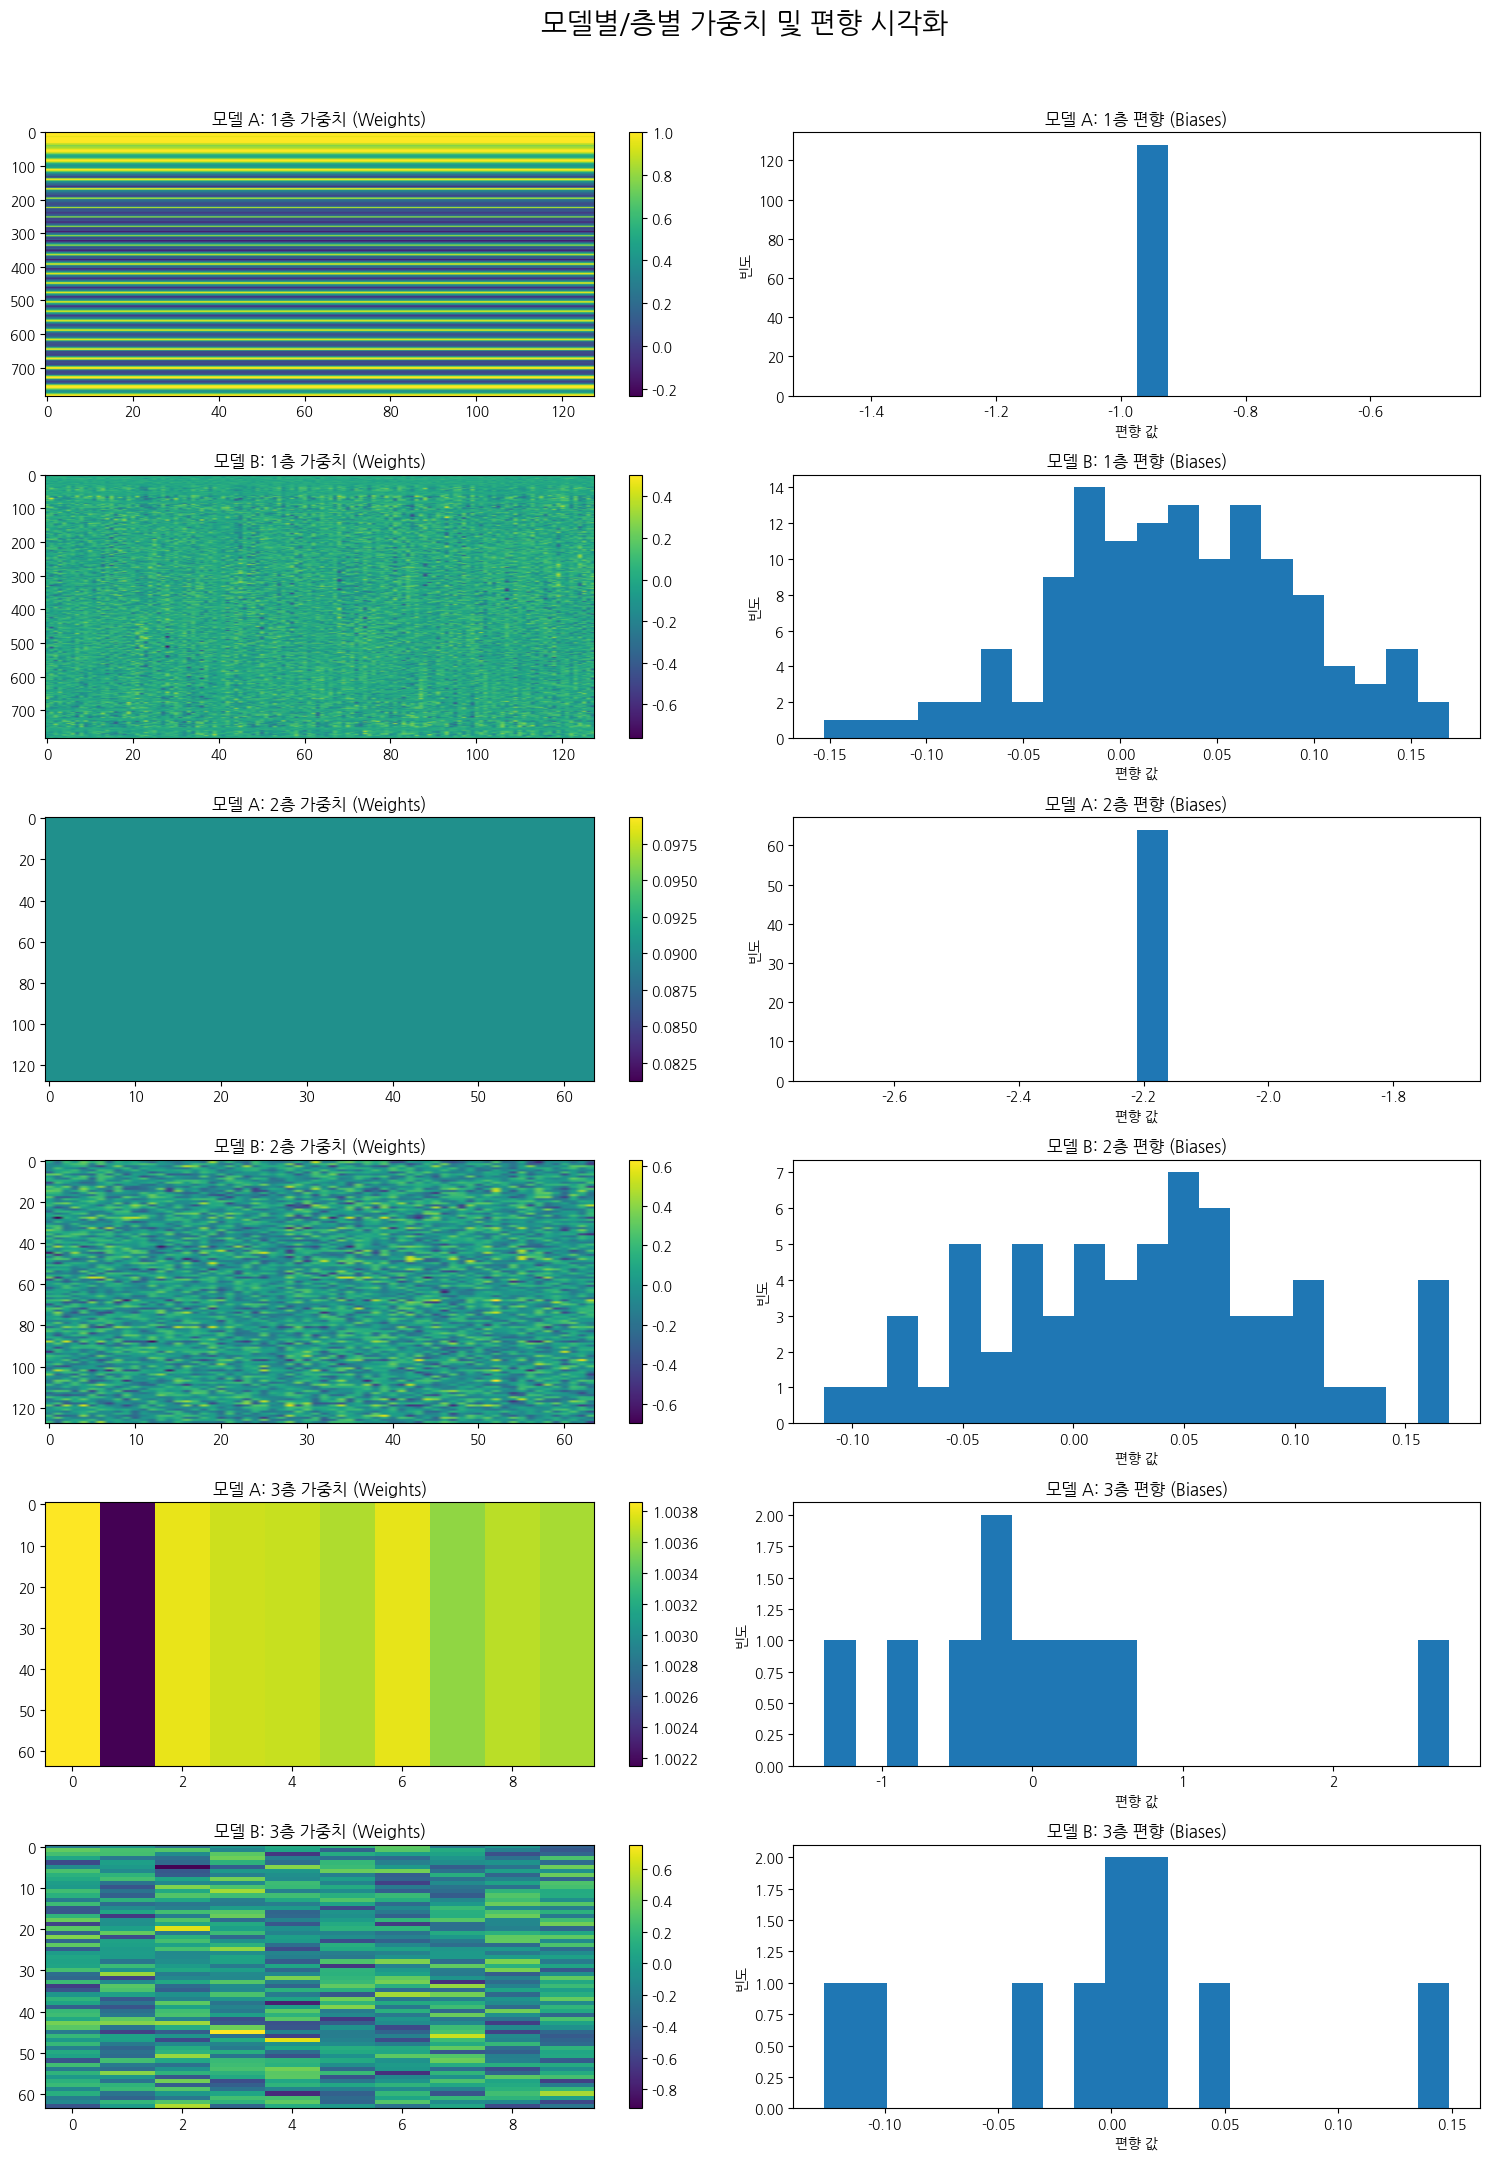

In [20]:
# ---------------------------------
# 7. 가중치 및 편향 분포 시각화
# ---------------------------------
print("--- 훈련 후 가중치 및 편향 분포 시각화 ---")

# 각 모델의 1, 2번 Dense 레이어에서 가중치와 편향을 가져옵니다.
weights_A1, biases_A1 = model_A.layers[1].get_weights()
weights_A2, biases_A2 = model_A.layers[2].get_weights()
weights_A3, biases_A3 = model_A.layers[3].get_weights()

weights_B1, biases_B1 = model_B.layers[1].get_weights()
weights_B2, biases_B2 = model_B.layers[2].get_weights()
weights_B3, biases_B3 = model_B.layers[3].get_weights()

# 4x2 형태의 서브플롯을 생성합니다.
fig, axes = plt.subplots(6, 2, figsize=(15, 22))
fig.suptitle('모델별/층별 가중치 및 편향 시각화', fontsize=20)

# --- Layer 1 시각화 ---

# 모델 A - 1층 가중치 (히트맵)
ax = axes[0, 0]
im = ax.imshow(weights_A1, cmap='viridis', aspect='auto')
fig.colorbar(im, ax=ax)
ax.set_title('모델 A: 1층 가중치 (Weights)')

# 모델 A - 1층 편향 (히스토그램)
ax = axes[0, 1]
ax.hist(biases_A1, bins=20)
ax.set_title('모델 A: 1층 편향 (Biases)')
ax.set_xlabel('편향 값')
ax.set_ylabel('빈도')

# 모델 B - 1층 가중치 (히트맵)
ax = axes[1, 0]
im = ax.imshow(weights_B1, cmap='viridis', aspect='auto')
fig.colorbar(im, ax=ax)
ax.set_title('모델 B: 1층 가중치 (Weights)')

# 모델 B - 1층 편향 (히스토그램)
ax = axes[1, 1]
ax.hist(biases_B1, bins=20)
ax.set_title('모델 B: 1층 편향 (Biases)')
ax.set_xlabel('편향 값')
ax.set_ylabel('빈도')

# --- Layer 2 시각화 ---

# 모델 A - 2층 가중치 (히트맵)
ax = axes[2, 0]
im = ax.imshow(weights_A2, cmap='viridis', aspect='auto')
fig.colorbar(im, ax=ax)
ax.set_title('모델 A: 2층 가중치 (Weights)')

# 모델 A - 2층 편향 (히스토그램)
ax = axes[2, 1]
ax.hist(biases_A2, bins=20)
ax.set_title('모델 A: 2층 편향 (Biases)')
ax.set_xlabel('편향 값')
ax.set_ylabel('빈도')

# 모델 B - 2층 가중치 (히트맵)
ax = axes[3, 0]
im = ax.imshow(weights_B2, cmap='viridis', aspect='auto')
fig.colorbar(im, ax=ax)
ax.set_title('모델 B: 2층 가중치 (Weights)')

# 모델 B - 2층 편향 (히스토그램)
ax = axes[3, 1]
ax.hist(biases_B2, bins=20)
ax.set_title('모델 B: 2층 편향 (Biases)')
ax.set_xlabel('편향 값')
ax.set_ylabel('빈도')

# --- Layer 3 시각화 ---
ax = axes[4, 0]
im = ax.imshow(weights_A3, cmap='viridis', aspect='auto')
fig.colorbar(im, ax=ax)
ax.set_title('모델 A: 3층 가중치 (Weights)')

ax = axes[4, 1]
ax.hist(biases_A3, bins=20)
ax.set_title('모델 A: 3층 편향 (Biases)')
ax.set_xlabel('편향 값')
ax.set_ylabel('빈도')

# 모델 B - 3층 가중치 (히트맵)
ax = axes[5, 0]
im = ax.imshow(weights_B3, cmap='viridis', aspect='auto')
fig.colorbar(im, ax=ax)
ax.set_title('모델 B: 3층 가중치 (Weights)')

# 모델 B - 3층 편향 (히스토그램)
ax = axes[5, 1]
ax.hist(biases_B3, bins=20)
ax.set_title('모델 B: 3층 편향 (Biases)')
ax.set_xlabel('편향 값')
ax.set_ylabel('빈도')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 보통의 신경망

In [21]:
# 모델 B의 첫 번째 Dense 레이어의 가중치를 가져옴
weights_B, biases_B = model_B.layers[1].get_weights()
print("\n--- 모델 B (표준 초기화)의 첫 번째 은닉층 가중치 ---")
print(f"가중치 행렬의 전체 형태: {weights_B.shape}")


--- 모델 B (표준 초기화)의 첫 번째 은닉층 가중치 ---
가중치 행렬의 전체 형태: (784, 128)


In [22]:
weights_B

array([[-0.05724937,  0.05090991, -0.07109039, ...,  0.07259888,
         0.04869495,  0.01231714],
       [ 0.01654045, -0.01993212,  0.02879839, ...,  0.06259722,
         0.02999285,  0.00137105],
       [-0.04944267, -0.0378945 , -0.06291656, ..., -0.00339546,
         0.08018721, -0.02317262],
       ...,
       [-0.00144204, -0.00478844,  0.00258747, ..., -0.03510547,
         0.0604639 ,  0.03728248],
       [-0.01210305,  0.08026791, -0.07416118, ..., -0.04633141,
        -0.00283289,  0.06743561],
       [-0.02145029,  0.04325355, -0.07789306, ...,  0.01249531,
         0.07237978, -0.04976201]], dtype=float32)